<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/food101_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Setting up Food101 and Other Dependencies

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a180345b-39bb-f2cb-df87-bbc4a32df6ff)


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

#Importing my Beautiful functions for flexibility
!wget https://raw.githubusercontent.com/elinteerie/Extra/main/helper_functions.py

from helper_functions import *

--2022-06-25 18:10:22--  https://raw.githubusercontent.com/elinteerie/Extra/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13968 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.64K  --.-KB/s    in 0s      

2022-06-25 18:10:23 (87.1 MB/s) - ‘helper_functions.py’ saved [13968/13968]



In [3]:
import tensorflow_datasets as tfds

In [4]:
datasets_list = tfds.list_builders()

In [5]:
for i in enumerate(datasets_list):
  print(i)


(0, 'abstract_reasoning')
(1, 'accentdb')
(2, 'aeslc')
(3, 'aflw2k3d')
(4, 'ag_news_subset')
(5, 'ai2_arc')
(6, 'ai2_arc_with_ir')
(7, 'amazon_us_reviews')
(8, 'anli')
(9, 'arc')
(10, 'bair_robot_pushing_small')
(11, 'bccd')
(12, 'beans')
(13, 'big_patent')
(14, 'bigearthnet')
(15, 'billsum')
(16, 'binarized_mnist')
(17, 'binary_alpha_digits')
(18, 'blimp')
(19, 'bool_q')
(20, 'c4')
(21, 'caltech101')
(22, 'caltech_birds2010')
(23, 'caltech_birds2011')
(24, 'cars196')
(25, 'cassava')
(26, 'cats_vs_dogs')
(27, 'celeb_a')
(28, 'celeb_a_hq')
(29, 'cfq')
(30, 'chexpert')
(31, 'cifar10')
(32, 'cifar100')
(33, 'cifar10_1')
(34, 'cifar10_corrupted')
(35, 'citrus_leaves')
(36, 'cityscapes')
(37, 'civil_comments')
(38, 'clevr')
(39, 'clic')
(40, 'clinc_oos')
(41, 'cmaterdb')
(42, 'cnn_dailymail')
(43, 'coco')
(44, 'coco_captions')
(45, 'coil100')
(46, 'colorectal_histology')
(47, 'colorectal_histology_large')
(48, 'common_voice')
(49, 'coqa')
(50, 'cos_e')
(51, 'cosmos_qa')
(52, 'covid19sum')
(

In [6]:
datasets_list[73]

'food101'

In [7]:
(train_data, test_data), ds_info = tfds.load(name ='food101', 
                                             split =['train', 'validation'],
                                             shuffle_files =True,
                                             as_supervised=True,
                                             with_info =True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete5GXCRB/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete5GXCRB/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


###Features of Food 101 from TFDS

In [9]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [10]:
class_names = ds_info.features['label'].names

In [11]:
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [12]:
train_one_sample = train_data.take(1)

In [13]:
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
# Output info
tf.random.set_seed(42)
for image, label in train_one_sample:
  print(f'''
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target: {label}
  class name: {class_names[label.numpy()]}
  
  ''')


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target: 16
  class name: cheesecake
  
  


In [15]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

In [16]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

###Plot an Image Tensor from TFDS

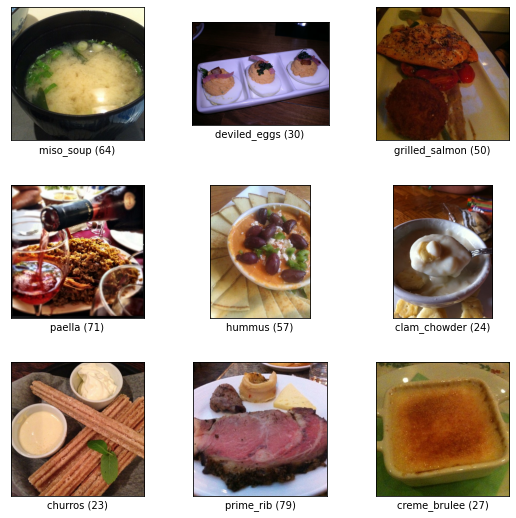

In [17]:
fig = tfds.show_examples(train_data, ds_info)

###Preprocessing Image

In [18]:
def preprocess_img(image, label, img_shape= 224):
  '''
  Converts image datatypes from 'unit8 too float32 and reshapes image to 
  [img_shape, img_shape, color_channels]
  
  Args:
  image: image iterable to pass
  label: image label for tfds
  img_shape: image shape
  '''
  image =tf.image.resize(image, [img_shape, img_shape])
  #image = image/255. #uncomment to scale
  return tf.cast(image, tf.float32), label



In [19]:
processed_image = preprocess_img(image, label)

In [20]:
processed_image[0].dtype

tf.float32

###Batch and prepare Datasets

In [21]:
train_data = train_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and turn into batch
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

#Map Processng to Test Data

test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)


In [22]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

###Set up Tensor Flow Mixed Precison

In [25]:
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


###Creating Our Feature Extractor

In [29]:
##Build Future extracion model

from tensorflow.keras import layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top =False)
base_model.trainable = False

#Create Functional Model

inputs = layers.Input(shape =input_shape, name='input_layer')

x = base_model(inputs, training =False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype=tf.float32, name='output_layer')(x)
model =tf.keras.Model(inputs, outputs)



#Compile the model

model.compile(loss ='SparseCategoricalCrossentropy', 
              optimizer = tf.keras.optimizers.Adam(),
              metrics =['accuracy'])

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_____________________________________________

###Check Dtype policy

In [33]:
for layer in model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_layer float32 <Policy "float32">
efficientnetb0 float32 <Policy "mixed_float16">
global_average_pooling2d float32 <Policy "mixed_float16">
dense float32 <Policy "mixed_float16">
output_layer float32 <Policy "float32">


In [37]:
base_model

In [39]:
for layer in model.layers[1].layers:
    print(layer.name, layer.dtype, layer.dtype_policy)


input_2 float32 <Policy "float32">
rescaling_1 float32 <Policy "mixed_float16">
normalization_1 float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Policy "mixed_float16">
block2a_dwconv_pad fl

In [ ]:
model.fit(train_data, 
          epochs = 5,
          validation_data =test_data,
          steps_per_epoch = len(train_data),
          validation_steps = len(test_data),
          callbacks =[create_tensorboard_callback('tensorboard', 'model1'),
                      create_model_checkpoint('Checkpoint')]
          )

Saving TensorBoard log files to: tensorboard/model1/20220625-190854
Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.8220 - accuracy: 0.5574
Epoch 1: saving model to Checkpoint/20220625-190854.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


2368/2368 [==============================] - 262s 103ms/step - loss: 1.8220 - accuracy: 0.5574 - val_loss: 1.2293 - val_accuracy: 0.6801
Epoch 2/5
2368/2368 [==============================] - ETA: 0s - loss: 1.2929 - accuracy: 0.6664
Epoch 2: saving model to Checkpoint/20220625-190854.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


2368/2368 [==============================] - 243s 102ms/step - loss: 1.2929 - accuracy: 0.6664 - val_loss: 1.1271 - val_accuracy: 0.6976
Epoch 3/5
2368/2368 [==============================] - ETA: 0s - loss: 1.1433 - accuracy: 0.7022
Epoch 3: saving model to Checkpoint/20220625-190854.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


2368/2368 [==============================] - 240s 100ms/step - loss: 1.1433 - accuracy: 0.7022 - val_loss: 1.0890 - val_accuracy: 0.7076
Epoch 4/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.0464 - accuracy: 0.7253
Epoch 4: saving model to Checkpoint/20220625-190854.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


INFO:tensorflow:Assets written to: Checkpoint/20220625-190854.ckpt/assets


2368/2368 [==============================] - 283s 118ms/step - loss: 1.0463 - accuracy: 0.7253 - val_loss: 1.0703 - val_accuracy: 0.7109
Epoch 5/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.9732 - accuracy: 0.7448